# Day 1

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Carregando base de dados

In [46]:
df = pd.read_csv("CEAPS_2008_2019.csv")

### Visualizando o tipo de variável de cada atributo

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268899 entries, 0 to 268898
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                268899 non-null  int64  
 1   MES                268899 non-null  int64  
 2   SENADOR            268899 non-null  object 
 3   TIPO_DESPESA       268899 non-null  object 
 4   CNPJ_CPF           265755 non-null  object 
 5   FORNECEDOR         265755 non-null  object 
 6   DOCUMENTO          246750 non-null  object 
 7   DATA               265755 non-null  object 
 8   DETALHAMENTO       154368 non-null  object 
 9   VALOR_REEMBOLSADO  268897 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 20.5+ MB


### Visualizando 10 linhas aleatórias

In [48]:
df.sample(10)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
257581,2019,10,JOSÉ SERRA,"Aluguel de imóveis para escritório político, c...",46.395.000/0001-39,Prefeitura do Município de São Paulo,NaN,24/07/2019,Senador José Serra - Despesa referente ao paga...,256.94
209551,2017,1,JOSÉ PIMENTEL,"Locomoção, hospedagem, alimentação, combustíve...",23.496.359/0001-05,POSTO SÃO CRISTOVÃO,346355,03/01/2017,DESPESA COM COMBUSTÍVEL EM VEÍCULOS UTILIZADOS...,188.77
12738,2009,7,MARISA SERRANO,Aquisição de material de consumo para uso no e...,07.620.358/0001-66,Casa D'água,2882,01/07/2009,NaN,52.00
26982,2010,11,JARBAS VASCONCELOS,"Contratação de consultorias, assessorias, pesq...",35.536.846/0001-25,Centro de Pesquisa de Mídia,733,19/11/2010,NaN,800.00
209411,2017,10,JOSÉ MEDEIROS,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,VIVO,S/N,26/10/2017,DESPESA COM TLEFONE CELULAR,100.70
240746,2018,5,PEDRO CHAVES DOS SANTOS FILHO,"Aluguel de imóveis para escritório político, c...",40.432.544/0445-19,Net - Claro S.A,1.81E+12,16/05/2018,Pagamento de despesas com telefonia referente ...,972.74
81483,2012,4,MAGNO MALTA,"Aluguel de imóveis para escritório político, c...",02.449.992/0081-49,VIVO,NaN,26/04/2012,NaN,225.50
88099,2012,5,ROBERTO REQUIÃO,"Locomoção, hospedagem, alimentação, combustíve...",02.221.155/0001-83,CONCESSIONÁRIA ECOVIA CAMINHO DO MAR S/A,COO100667,14/05/2012,NaN,13.90
225979,2018,9,ATAÍDES OLIVEIRA,"Aluguel de imóveis para escritório político, c...",13.851.500/0001-89,VANIA IMOVEIS LTDA ME,NaN,06/09/2018,NaN,2500.00
124815,2014,6,ANTÔNIO CARLOS VALADARES,"Passagens aéreas, aquáticas e terrestres nacio...",02.575.829/0001-48,AVIANCA,6XRXHV,29/05/2014,Passagem aérea Senador Antonio Carlos Valadare...,839.30


### Excluindo o atributo Documentos

In [49]:
df.drop('DOCUMENTO', axis=1, inplace=True) 

### verificando valores nulos 

In [50]:
df.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF              True
FORNECEDOR            True
DATA                  True
DETALHAMENTO          True
VALOR_REEMBOLSADO     True
dtype: bool

In [51]:
df.CNPJ_CPF = df.CNPJ_CPF.fillna('Nao Informado')
df.FORNECEDOR = df.FORNECEDOR.fillna('Nao Informado')
df.DETALHAMENTO = df.DETALHAMENTO.fillna('Nao Informado')
df.DATA = df.DATA.fillna('Nao Informado')

In [52]:
df[df['VALOR_REEMBOLSADO'].isnull()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
149869,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",NaN
149876,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",NaN


In [53]:
df.loc[[149869],'VALOR_REEMBOLSADO']=df.loc[[149869],'VALOR_REEMBOLSADO'].replace(NaN, 469.53)
df.loc[[149876],'VALOR_REEMBOLSADO']=df.loc[[149876],'VALOR_REEMBOLSADO'].replace(NaN, 460.45)

NameError: name 'NaN' is not defined

In [ ]:
df.loc[[149869,149876]]


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
149869,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",469.53
149876,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",460.45


In [ ]:
df.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DATA                 False
DETALHAMENTO         False
VALOR_REEMBOLSADO    False
dtype: bool

In [ ]:
df[df['VALOR_REEMBOLSADO']<0]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
162849,2015,1,RANDOLFE RODRIGUES,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,Tam Linhas Aereas S/A,28/01/2015,"9572100929351 - R$ 1.298,93 (1º bilhete emitid...",-9.0
200967,2017,5,DÁRIO BERGER,"Contratação de consultorias, assessorias, pesq...",73.228.876/0001-63,TV CLIPAGEM LTDA. EPP.,02/06/2017,Despesa com Monitoramento de Informação Jornal...,-243.4


### Convertendo os valores negativos para valores absolutos

In [ ]:
df['VALOR_REEMBOLSADO'] = abs(df['VALOR_REEMBOLSADO'])

# Day 2

### Vendo colunas

In [ ]:
df.columns


Index(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO'],
      dtype='object')

### Evolução dos gastos ao longo dos anos

<Axes: title={'center': 'Gastos Totais por Ano'}, xlabel='ANO'>

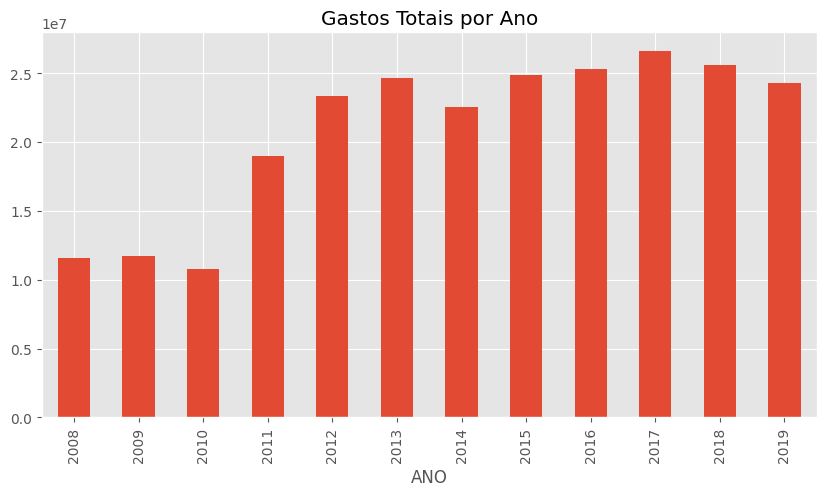

In [ ]:
# Gastos totais por ano
gastos_ano = df.groupby("ANO")["VALOR_REEMBOLSADO"].sum()

gastos_ano.plot(kind="bar", figsize=(10,5), title="Gastos Totais por Ano")


### Tipos de depesas mais gastos


In [ ]:
# Agrupar os gastos por tipo de despesa e pegar os top 10
despesas_top10 = (
    df.groupby("TIPO_DESPESA")["VALOR_REEMBOLSADO"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()  # Para transformar em DataFrame e poder usar .style
)

# Formatar os valores em moeda brasileira
despesas_top10.style.format({"VALOR_REEMBOLSADO": "R${:,.2f}"})


,TIPO_DESPESA,VALOR_REEMBOLSADO
0,"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes","R$64,056,430.15"
1,"Passagens aéreas, aquáticas e terrestres nacionais","R$56,388,198.82"
2,"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.","R$47,922,809.61"
3,"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar","R$37,193,016.49"
4,Divulgação da atividade parlamentar,"R$31,828,000.34"
5,"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.","R$9,806,573.89"
6,Serviços de Segurança Privada,"R$2,995,828.11"


### Meses com mais gastos

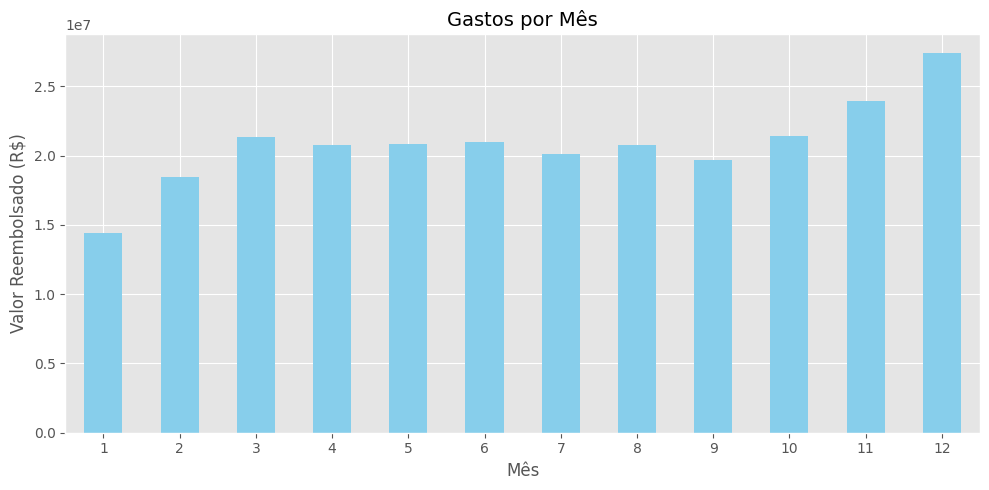

In [ ]:
# Agrupar gastos por mês
gastos_mes = df.groupby("MES")["VALOR_REEMBOLSADO"].sum()

# Plot simples e limpo
plt.figure(figsize=(10,5))
gastos_mes.plot(kind="bar", color="skyblue")
plt.title("Gastos por Mês", fontsize=14)
plt.xlabel("Mês")
plt.ylabel("Valor Reembolsado (R$)")
plt.xticks(rotation=0)  # Deixa os meses na horizontal
plt.tight_layout()
plt.show()


### Maiores gastadores (parlamentares)

In [ ]:
# Top 10 senadores que mais gastaram no período todo
top_gastadores = (
    df.groupby("SENADOR")["VALOR_REEMBOLSADO"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_gastadores


SENADOR
FERNANDO COLLOR       4003025.92
SÉRGIO PETECÃO        3879296.95
VANESSA GRAZZIOTIN    3862755.80
CIRO NOGUEIRA         3852571.98
ROMERO JUCÁ           3839386.45
PAULO PAIM            3786962.67
VALDIR RAUPP          3647510.60
HUMBERTO COSTA        3559354.26
RANDOLFE RODRIGUES    3469375.37
JOÃO CAPIBERIBE       3452652.17
Name: VALOR_REEMBOLSADO, dtype: float64

<Axes: title={'center': 'Top 10 Senadores que Mais Gastaram'}, xlabel='SENADOR'>

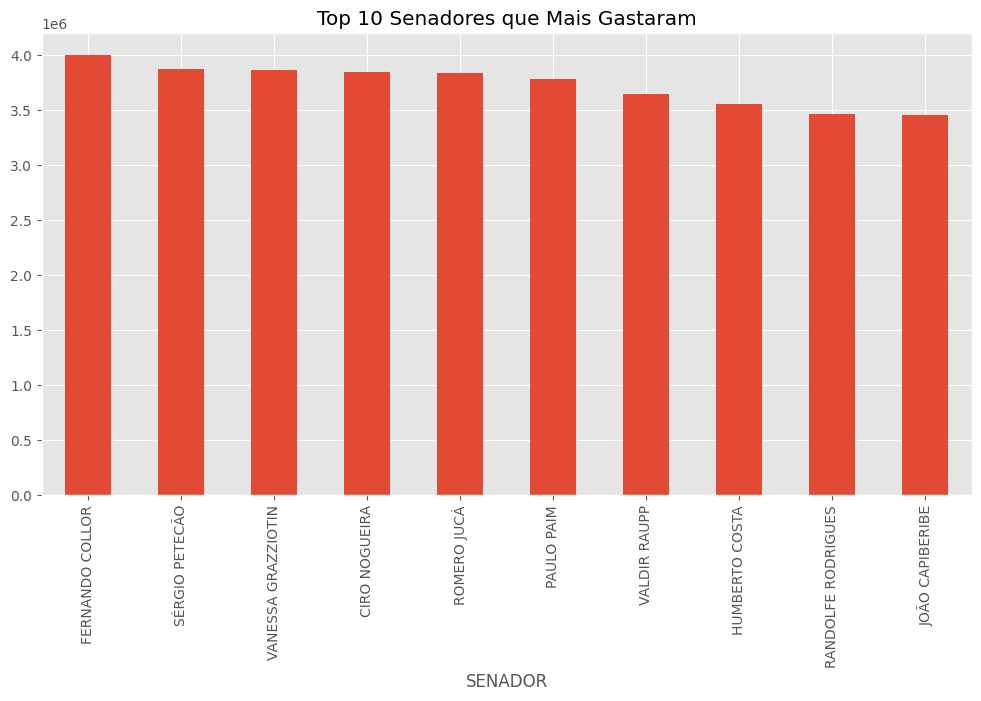

In [ ]:
top_gastadores.plot(kind="bar", figsize=(12,6), title="Top 10 Senadores que Mais Gastaram")


### Categoria de despesas 

In [ ]:
# Gastos por tipo de despesa
categorias = df.groupby("TIPO_DESPESA")["VALOR_REEMBOLSADO"].sum().sort_values(ascending=False)
categorias


TIPO_DESPESA
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   64056430.15
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 56388198.82
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           47922809.61
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             37193016.49
Divulgação da atividade parlamentar                                                                                                                            

### Boxplot dos gastos
